In [1]:
# Import packages

# Regression Models
%matplotlib inline
#%matplotlib widget
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.svm import SVR
from collections import Counter
from lightgbm import LGBMRegressor
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor, XGBRFRegressor
from sklearn.neighbors import KNeighborsRegressor, KNeighborsTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, GradientBoostingRegressor,
RandomForestRegressor, VotingRegressor, HistGradientBoostingRegressor, ExtraTreesRegressor, StackingRegressor)

# Preprocessing
from sklearn.feature_selection import SelectKBest, f_regression, RFE, RFECV
from sklearn.preprocessing import LabelEncoder, StandardScaler ,OneHotEncoder, MinMaxScaler, PolynomialFeatures

# model_selection
from sklearn.model_selection import (train_test_split, KFold, cross_val_score, GridSearchCV, StratifiedKFold, 
learning_curve, cross_val_predict, cross_validate, permutation_test_score, validation_curve, RandomizedSearchCV)

# Metrics
from sklearn.metrics import (accuracy_score, cohen_kappa_score, confusion_matrix, mean_squared_error, r2_score,
root_mean_squared_error, recall_score, roc_auc_score, roc_curve, mean_absolute_error, auc, classification_report, f1_score)

#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000) 

In [31]:
df = pd.read_csv('shampoo.csv', engine='pyarrow')
df.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [32]:
# Lowering columns
df.columns = df.columns.str.lower() 

In [33]:
# Data Integrity Check
print("Big Query Statistics:")
print('-' * 127)
print(f"🚣‍♀️ DataFrame Shape: {df.shape}")
print('-' * 127)
print(f"Columns to list:\n{df.columns.tolist()}")
print('-' * 127)
print(f"📊 DataFrame Info: {df.info(memory_usage='deep')}")
print('-' * 127)
print(f"📈 DataFrame Distribution:\n {df.describe()}")
print('-' * 127)

Big Query Statistics:
-------------------------------------------------------------------------------------------------------------------------------
🚣‍♀️ DataFrame Shape: (36, 2)
-------------------------------------------------------------------------------------------------------------------------------
Columns to list:
['month', 'sales']
-------------------------------------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   month   36 non-null     object 
 1   sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.6 KB
📊 DataFrame Info: None
-------------------------------------------------------------------------------------------------------------------------------
📈 DataFrame Distribution:
             sales
count   36.000000
mean   312.60

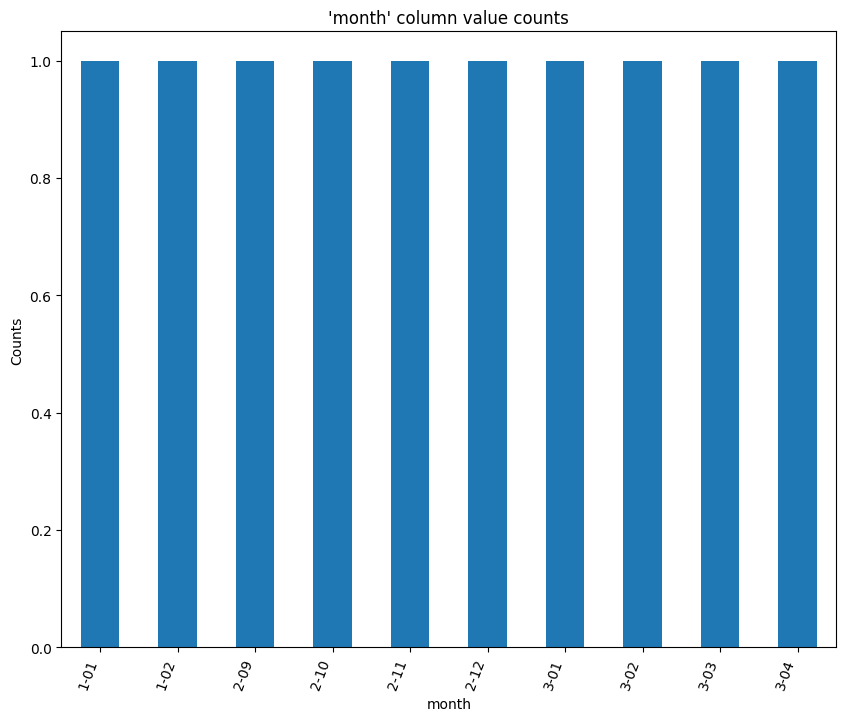

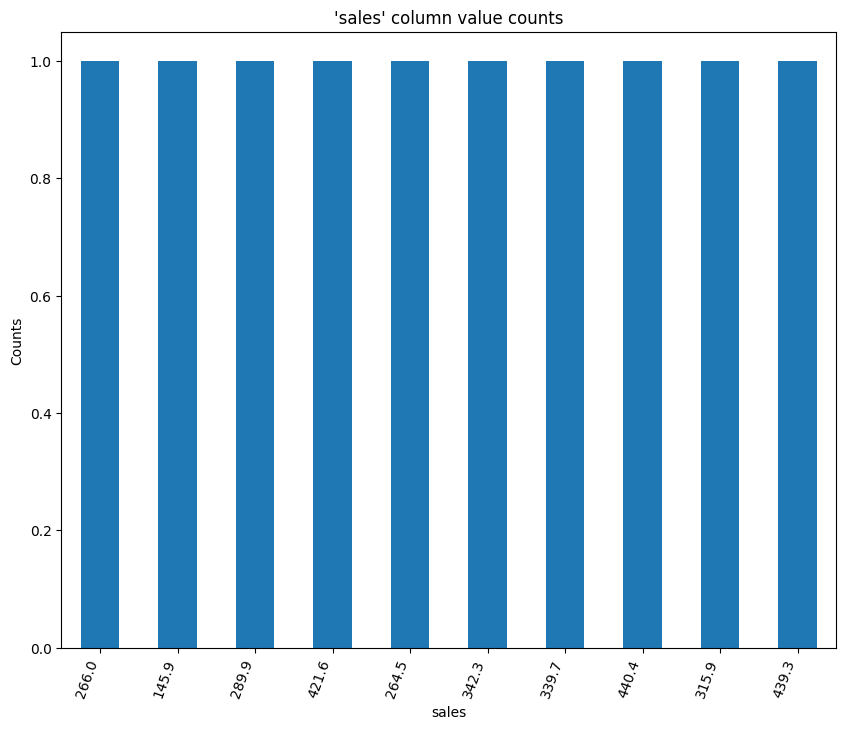

In [34]:
# Data Distribution
# Exploratory Data Analysis
def eda_plot(column, topn=10):
    plt.figure(figsize=(10, 8))
    df[column].value_counts().nlargest(topn).plot(kind='bar')
    plt.title(f"'{column}' column value counts")
    plt.ylabel("Counts")
    plt.xticks(rotation = 70, ha='right')
    plt.show()

columns = df.columns

for column in columns:
    eda_plot(column)

In [36]:
df['date'] = pd.to_datetime(df['month'], format='%m-%d')

In [38]:
df.drop(columns=['month'], axis=1, inplace=True)

In [40]:
# Extract month and day from date column
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [42]:
df.drop(columns=['date'], axis=1, inplace=True)

In [44]:
# Moving columns positions
m = df.pop('month')
df.insert(0, 'month', m)

In [46]:
# Moving columns positions
d = df.pop('day')
df.insert(1, 'day', d)

        sales
month        
1      2357.5
2      3153.5
3      5742.6


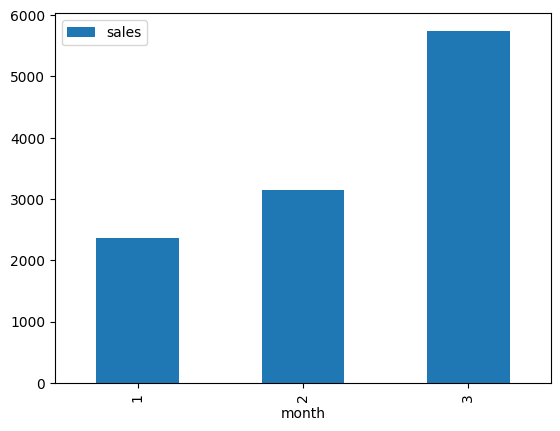

In [70]:
print(df.groupby('month')[['sales']].sum())
df.groupby('month')[['sales']].sum().plot(kind='bar');

In [71]:
print(f"The month with the most amount of sales was the {df['month'].max()} month whose names it's March.")

The month with the most amount of sales was the 3 month whose names it's March.


In [63]:
print(f"The month with the least amount of sales was the {df['month'].min()} month whose names it's January.")

The month with the least amount of sales was the 1 month whose names it's January.


In [65]:
#print(f"The month with the most sales was {df[df['month'] == 3].iloc[0]}")

     sales
35  5742.6
34  5095.7
33  4514.4
32  4039.1
31  3357.1
23  3153.5
30  2949.5
22  2811.2
21  2546.7
29  2374.0
11  2357.5
10  2171.6
20  2125.1
28  1936.6
19  1835.2
9   1835.1
8   1712.2
27  1535.3
18  1531.6
7   1519.4
17  1305.6
6   1294.9
26  1096.0
5   1063.1
16  1018.6
4    894.6
15   827.2
25   780.1
3    714.3
2    595.0
14   553.9
1    411.9
13   343.8
24   339.7
0    266.0
12   194.3


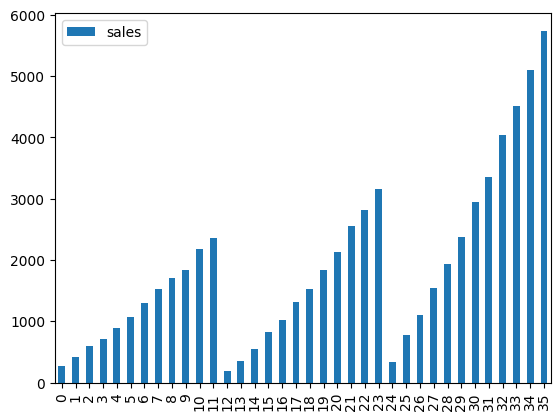

In [76]:
print(df.groupby('month')[['sales']].cumsum().sort_values(by='sales', ascending=False))
df.groupby('month')[['sales']].cumsum().plot(kind='bar');

    sales
35  682.0
34  682.0
33  682.0
32  682.0
31  575.5
30  575.5
26  440.4
25  440.4
27  440.4
28  440.4
29  440.4
23  421.6
22  421.6
21  421.6
24  339.7
10  336.5
11  336.5
19  303.6
20  303.6
18  287.0
17  287.0
16  273.3
15  273.3
1   266.0
9   266.0
8   266.0
7   266.0
6   266.0
5   266.0
4   266.0
3   266.0
2   266.0
0   266.0
14  210.1
13  194.3
12  194.3


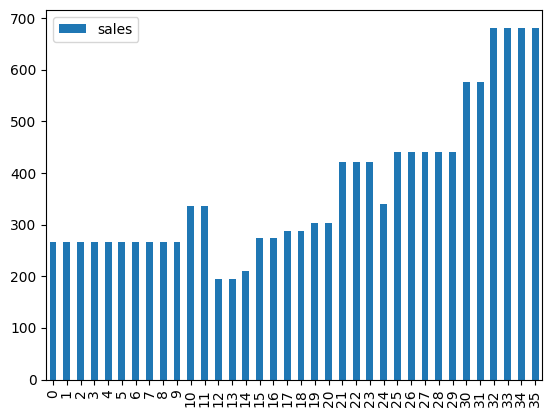

In [81]:
print(df.groupby('month')[['sales']].cummax().sort_values(by='sales', ascending=False))
df.groupby('month')[['sales']].cummax().plot(kind='bar');

    sales
24  339.7
25  339.7
35  315.9
34  315.9
33  315.9
32  315.9
31  315.9
30  315.9
29  315.9
28  315.9
27  315.9
26  315.9
0   266.0
12  194.3
20  149.5
14  149.5
23  149.5
22  149.5
21  149.5
13  149.5
19  149.5
17  149.5
16  149.5
15  149.5
18  149.5
1   145.9
2   145.9
11  119.3
10  119.3
9   119.3
8   119.3
7   119.3
6   119.3
5   119.3
4   119.3
3   119.3


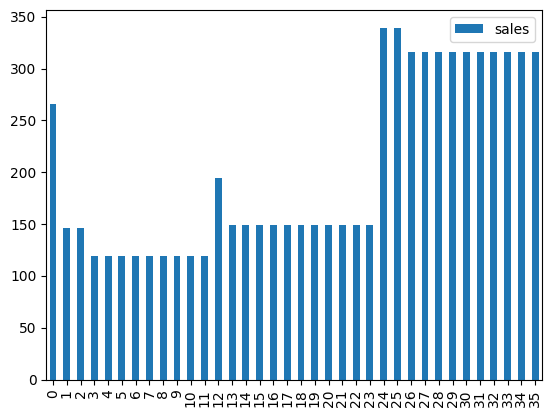

In [82]:
print(df.groupby('month')[['sales']].cummin().sort_values(by='sales', ascending=False))
df.groupby('month')[['sales']].cummin().plot(kind='bar');

In [47]:
df.head()

,month,day,sales
0,1,1,266.0
1,1,2,145.9
2,1,3,183.1
3,1,4,119.3
4,1,5,180.3
